In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,SpectralClustering,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage,dendrogram
import copy
from sklearn.metrics import adjusted_rand_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

In [2]:
#functional measures'
bc_fc_NT = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/NT_fc_v1_bc_data.xlsx'))
cc_fc_NT = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/NT_fc_v1_cc_data.xlsx'))
deg_fc_NT = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/NT_fc_v1_deg_data.xlsx'))
ecc_fc_NT = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/NT_fc_v1_ecc_data.xlsx'))
str_fc_NT = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/NT_fc_v1_str_data.xlsx'))
glob_fc_NT = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/NT_fc_v1_glob_data.xlsx'))

bc_fc_ASD = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/ASD_fc_v1_bc_data.xlsx'))
cc_fc_ASD = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/ASD_fc_v1_cc_data.xlsx'))
deg_fc_ASD = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/ASD_fc_v1_deg_data.xlsx'))
ecc_fc_ASD = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/ASD_fc_v1_ecc_data.xlsx'))
str_fc_ASD = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/ASD_fc_v1_str_data.xlsx'))
glob_fc_ASD = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/ASD_fc_v1_glob_data.xlsx'))

In [3]:
#structural measures'
bc_w_NT = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/NT_w_v1_bc_data.xlsx'))
cc_w_NT = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/NT_w_v1_cc_data.xlsx'))
deg_w_NT = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/NT_w_v1_deg_data.xlsx'))
ecc_w_NT = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/NT_w_v1_ecc_data.xlsx'))
str_w_NT = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/NT_w_v1_str_data.xlsx'))
glob_w_NT = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/NT_w_v1_glob_data.xlsx'))

bc_w_ASD = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/ASD_w_v1_bc_data.xlsx'))
cc_w_ASD = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/ASD_w_v1_cc_data.xlsx'))
deg_w_ASD = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/ASD_w_v1_deg_data.xlsx'))
ecc_w_ASD = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/ASD_w_v1_ecc_data.xlsx'))
str_w_ASD = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/ASD_w_v1_str_data.xlsx'))
glob_w_ASD = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/ASD_w_v1_glob_data.xlsx'))

In [4]:
#sc-fc coupling
sc_fc_NT = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/NT_scfc_v1_data.xlsx'))
sc_fc_ASD = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Graph_theory/Dissertation_code/Graph_measure_values/ASD_scfc_v1_data.xlsx'))

In [5]:
RM96 = np.array(pd.read_excel('/Users/domo/Documents/MATLAB/Data/RM96_labels.xlsx'))
bc_w = [f'bc_w_'+RM96[i][0] for i in range(0,96)]
cc_w = [f'cc_w_'+RM96[i][0] for i in range(0,96)]
deg_w = [f'deg_w_'+RM96[i][0] for i in range(0,96)]
ecc_w = [f'ecc_w_'+RM96[i][0] for i in range(0,96)]
str_w = [f'str_w_'+RM96[i][0] for i in range(0,96)]
glob_w = ['assortativity_w','transitivity_w','charpath_w','efficiency_w','diameter_w','radius_w','mod_w','swp_w']

bc_fc = [f'bc_fc_'+RM96[i][0] for i in range(0,96)]
cc_fc = [f'cc_fc_'+RM96[i][0] for i in range(0,96)]
deg_fc = [f'deg_fc_'+RM96[i][0] for i in range(0,96)]
ecc_fc = [f'ecc_fc_'+RM96[i][0] for i in range(0,96)]
str_fc = [f'str_fc_'+RM96[i][0] for i in range(0,96)]
glob_fc = ['assortativity_fc','transitivity_fc','charpath_fc','efficiency_fc','diameter_fc','radius_fc','mod_fc','swp_fc']

sc_fc = [f'sc_fc_'+RM96[i][0] for i in range(0,96)]

features_w = []
features_fc = []
features_all = []

features_w.append(bc_w)
features_w.append(cc_w)
features_w.append(deg_w)
features_w.append(ecc_w)
features_w.append(str_w)
features_w.append(glob_w)
features_fc.append(bc_fc)
features_fc.append(cc_fc)
features_fc.append(deg_fc)
features_fc.append(ecc_fc)
features_fc.append(str_fc)
features_fc.append(glob_fc)
features_all.append(bc_w)
features_all.append(cc_w)
features_all.append(deg_w)
features_all.append(ecc_w)
features_all.append(str_w)
features_all.append(glob_w)
features_all.append(bc_fc)
features_all.append(cc_fc)
features_all.append(deg_fc)
features_all.append(ecc_fc)
features_all.append(str_fc)
features_all.append(glob_fc)
features_all.append(sc_fc)


features_w_labels = [item for sublist in features_w for item in sublist]
features_fc_labels = [item for sublist in features_fc for item in sublist]
features_all_labels = [item for sublist in features_all for item in sublist]
len(features_all_labels)

1072

In [6]:
ASD_w = np.concatenate((bc_w_ASD[:,1:],cc_w_ASD[:,1:],deg_w_ASD[:,1:],ecc_w_ASD[:,1:],str_w_ASD[:,1:],glob_w_ASD[:,1:]),axis=1)
NT_w = np.concatenate((bc_w_NT[:,1:],cc_w_NT[:,1:],deg_w_NT[:,1:],ecc_w_NT[:,1:],str_w_NT[:,1:],glob_w_NT[:,1:]),axis=1)

ASD_fc = np.concatenate((bc_fc_ASD[:,1:],cc_fc_ASD[:,1:],deg_fc_ASD[:,1:],ecc_fc_ASD[:,1:],str_fc_ASD[:,1:],glob_fc_ASD[:,1:]),axis=1)
NT_fc = np.concatenate((bc_fc_NT[:,1:],cc_fc_NT[:,1:],deg_fc_NT[:,1:],ecc_fc_NT[:,1:],str_fc_NT[:,1:],glob_fc_NT[:,1:]),axis=1)

w_all = np.concatenate((ASD_w,NT_w))
fc_all = np.concatenate((ASD_fc,NT_fc))
sc_fc_all = np.concatenate((sc_fc_ASD[:,1:],sc_fc_NT[:,1:]))

X = np.concatenate((w_all,fc_all,sc_fc_all),axis=1)
X.shape

(65, 1072)

In [7]:
# diagnosis as group labels
NT_y = -1*np.ones((30,))
ASD_y = np.ones((35,))
diag_labels = np.concatenate((ASD_y,NT_y))

In [8]:

loo = LeaveOneOut()
#cv5 = StratifiedKFold(5)
clf = svm.SVC(kernel='linear',C=1.0)
scaler = preprocessing.StandardScaler().fit(X)
X_nrm = scaler.transform(X)

scores = cross_val_score(clf, X, diag_labels, cv=loo)
print("Full data, not normalized:")
print(np.mean(scores))

scores_nrm = cross_val_score(clf, X_nrm, diag_labels, cv=loo)
print("Full data, normalized:")
print(np.mean(scores_nrm))


Full data, not normalized:
0.5230769230769231
Full data, normalized:
0.35384615384615387


In [9]:
#right inferior parietal cortex = 33
ASD_scfc_pT = sc_fc_ASD[:,33].reshape((35,1))
NT_scfc_pT = sc_fc_NT[:,33].reshape((30,1))

#left superior parietal cortex = 85
ASD_w_pT = bc_w_ASD[:,85].reshape((35,1))
NT_w_pT = bc_w_NT[:,85].reshape((30,1))

#right superior temporal cortex = 2, right primary motor cortex = 32, right dorsolateral premotor cortex = 41
ASD_fc_pT = np.concatenate((bc_fc_ASD[:,2].reshape((35,1)),cc_fc_ASD[:,32].reshape((35,1)),cc_fc_ASD[:,41].reshape((35,1)),deg_fc_ASD[:,2].reshape((35,1)),str_fc_ASD[:,2].reshape((35,1))),axis=1)
NT_fc_pT = np.concatenate((bc_fc_NT[:,2].reshape((30,1)),cc_fc_NT[:,32].reshape((30,1)),cc_fc_NT[:,41].reshape((30,1)),deg_fc_NT[:,2].reshape((30,1)),str_fc_NT[:,2].reshape((30,1))),axis=1)


w_all_pT = np.concatenate((ASD_w_pT,NT_w_pT))
fc_all_pT = np.concatenate((ASD_fc_pT,NT_fc_pT))
scfc_all_pT = np.concatenate((ASD_scfc_pT,NT_scfc_pT))

X_pT = np.concatenate((w_all_pT,fc_all_pT,scfc_all_pT),axis=1)
X_pT.shape

(65, 7)

In [10]:
pT_features = ['bc_w_PCs_L','bc_fc_TCs_R','cc_fc_M1_R','cc_fc_PMCdl','deg_fc_TCs_R','str_fc_TCs_R','scfc_PCi_R']

In [11]:
scaler_pT = preprocessing.StandardScaler().fit(X_pT)
X_pT_nrm = scaler_pT.transform(X_pT)

#loo = LeaveOneOut()
scores_pT_nrm = cross_val_score(clf, X_pT_nrm, diag_labels, cv=loo)

scores_pT = cross_val_score(clf, X_pT, diag_labels, cv = loo)

print("Permutation Test Feautures, not normalized:")
print(np.mean(scores_pT))

print("Permutation Test Features, normalized:")
print(np.mean(scores_pT_nrm))

Permutation Test Feautures, not normalized:
0.7846153846153846
Permutation Test Features, normalized:
0.8


In [12]:
#left superior parietal cortex = 85
ASD_w_consistent_pT = bc_w_ASD[:,85].reshape((35,1))
NT_w_consistent_pT = bc_w_NT[:,85].reshape((30,1))

#right superior temporal cortex = 2
ASD_fc_consistent_pT = np.concatenate((bc_fc_ASD[:,2].reshape((35,1)),str_fc_ASD[:,2].reshape((35,1))),axis=1)
NT_fc_consistent_pT = np.concatenate((bc_fc_NT[:,2].reshape((30,1)),str_fc_NT[:,2].reshape((30,1))),axis=1)


w_all_consistent_pT = np.concatenate((ASD_w_consistent_pT,NT_w_consistent_pT))
fc_all_consistent_pT = np.concatenate((ASD_fc_consistent_pT,NT_fc_consistent_pT))

X_consistent_pT = np.concatenate((w_all_consistent_pT,fc_all_consistent_pT),axis=1)
X_consistent_pT.shape


(65, 3)

In [14]:
scaler_consistent_pT = preprocessing.StandardScaler().fit(X_consistent_pT)
X_consistent_pT_nrm = scaler_consistent_pT.transform(X_consistent_pT)

#loo = LeaveOneOut()
scores_consistent_pT_nrm = cross_val_score(clf, X_consistent_pT_nrm, diag_labels, cv=loo)

scores_consistent_pT = cross_val_score(clf, X_consistent_pT, diag_labels, cv = loo)

print("Permutation Test Feautures, not normalized:")
print(np.mean(scores_consistent_pT))

print("Permutation Test Features, normalized:")
print(np.mean(scores_consistent_pT_nrm))

Permutation Test Feautures, not normalized:
0.7692307692307693
Permutation Test Features, normalized:
0.7538461538461538


In [16]:
X_pT_copy = copy.deepcopy(X_pT)
scores_ind = []
for i in range(7):
    x = X_pT_copy[:,i]
    x = x.reshape((-1,1))
    scaler_x = preprocessing.StandardScaler().fit(x)
    x_nrm = scaler_x.transform(x)
    score = cross_val_score(clf,x_nrm,diag_labels,cv=loo)
    scores_ind.append(np.mean(score))

for i in range(7):
    print(pT_features[i])
    print(scores_ind[i])

bc_w_PCs_L
0.6461538461538462
bc_fc_TCs_R
0.6153846153846154
cc_fc_M1_R
0.6615384615384615
cc_fc_PMCdl
0.6615384615384615
deg_fc_TCs_R
0.6923076923076923
str_fc_TCs_R
0.676923076923077
scfc_PCi_R
0.6923076923076923


In [28]:
#all possible feature combinations
from itertools import combinations
combos = []
scores_combos = []
for i in range(2,8):
    poss_combos = list(combinations(range(7),i))
    for j in range(len(poss_combos)):
        x = X_pT_copy[:,np.array(poss_combos[j])]
        scaler_x = preprocessing.StandardScaler().fit(x)
        x_nrm = scaler_x.transform(x)
        score = cross_val_score(clf,x_nrm,diag_labels,cv=loo)
        combos.append(list(poss_combos[j]))
        scores_combos.append(np.mean(score))


In [34]:
max_score = max(scores_combos)
max_score_ind = scores_combos.index(max_score)
best_combo = combos[max_score_ind]


print("Best combo is")
for k in range(len(best_combo)):
    print(pT_features[best_combo[k]])
print(max_score)


Best combo is
bc_w_PCs_L
cc_fc_M1_R
str_fc_TCs_R
scfc_PCi_R
0.8461538461538461


Text(0.5, 1.0, 'Principal Component, Whole Dataset')

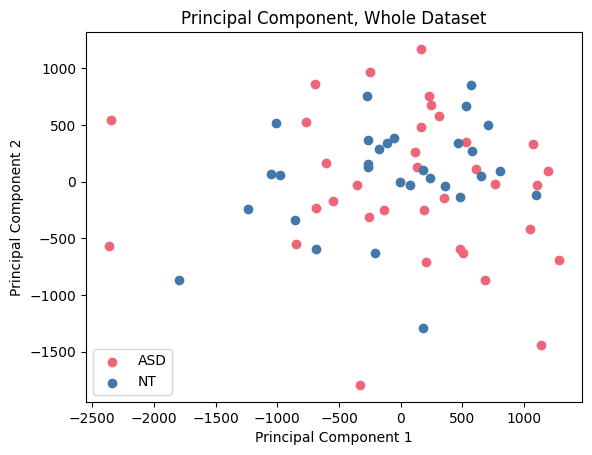

In [15]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)
fig,ax = plt.subplots()
ax.scatter(pca_features[0:35,0],pca_features[0:35,1],color='#EE6677',label='ASD')
ax.scatter(pca_features[35:65,0],pca_features[35:65,1],color='#4477AA',label='NT')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.legend(loc='lower left')
ax.set_title('Principal Component, Whole Dataset')

Text(0.5, 1.0, 'Principal Component, All Significantly Different Features Except Community Structure (7 total)')

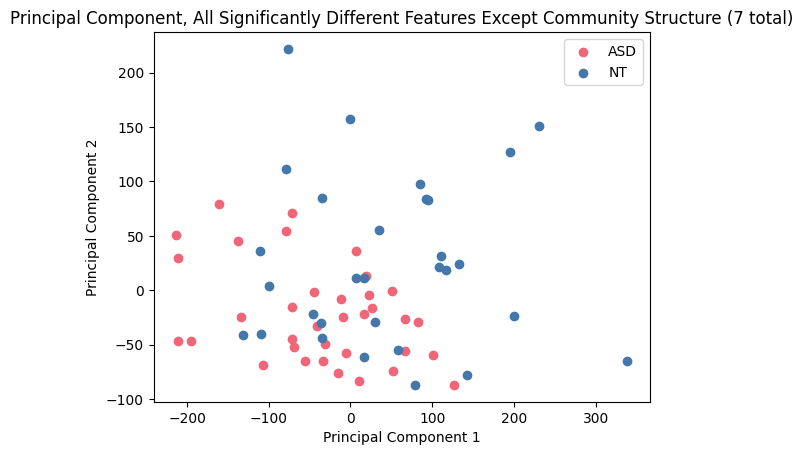

In [18]:
pca_pT = pca.fit_transform(X_pT)
fig,ax = plt.subplots()
ax.scatter(pca_pT[0:35,0],pca_pT[0:35,1],color='#EE6677',label='ASD')
ax.scatter(pca_pT[35:65,0],pca_pT[35:65,1],color='#4477AA',label='NT')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.legend(loc='upper right')
ax.set_title('Principal Component, All Significantly Different Features Except Community Structure (7 total)')

Text(0.5, 1.0, 'Principal Component, Significantly Different Features That Were Consistent Across Thresholds (3 total)')

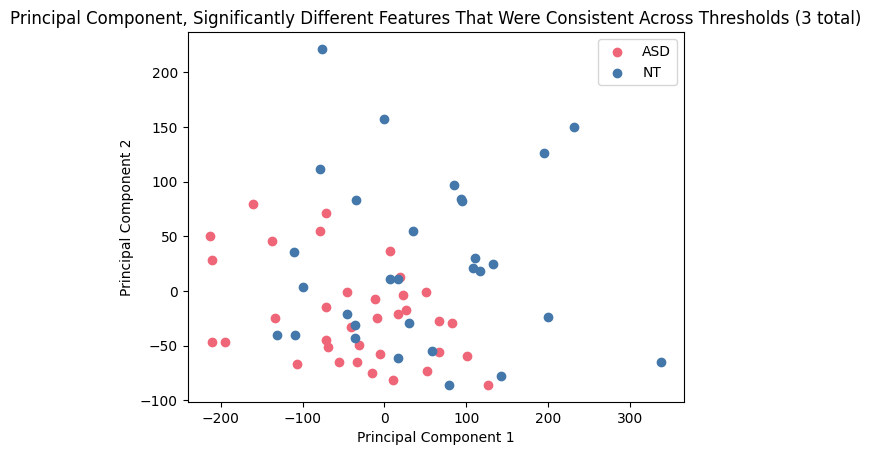

In [17]:
pca_consistent_pT = pca.fit_transform(X_consistent_pT)
fig,ax = plt.subplots()
ax.scatter(pca_consistent_pT[0:35,0],pca_consistent_pT[0:35,1],color='#EE6677',label='ASD')
ax.scatter(pca_consistent_pT[35:65,0],pca_consistent_pT[35:65,1],color='#4477AA',label='NT')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.legend(loc='upper right')
ax.set_title('Principal Component, Significantly Different Features That Were Consistent Across Thresholds (3 total)')